<a href="https://colab.research.google.com/github/akash-elangovan/Prediciton-of-Mechanical-Properties-for-Low-Alloy-Steels/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **Data Preprocessing**

In [ ]:
# reading the dataset file
data = pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT/NIMS Low Alloy Steels Dataset.csv')
columns = list(data.columns)
data.head().T

,0,1,2,3,4
Alloy code,MBB,MBB,MBB,MBB,MBB
C,0.12,0.12,0.12,0.12,0.12
Si,0.36,0.36,0.36,0.36,0.36
Mn,0.52,0.52,0.52,0.52,0.52
P,0.009,0.009,0.009,0.009,0.009
S,0.003,0.003,0.003,0.003,0.003
Ni,0.089,0.089,0.089,0.089,0.089
Cr,0.97,0.97,0.97,0.97,0.97
Mo,0.61,0.61,0.61,0.61,0.61
Cu,0.04,0.04,0.04,0.04,0.04


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Alloy code                915 non-null    object 
 1    C                        915 non-null    float64
 2    Si                       915 non-null    float64
 3    Mn                       915 non-null    float64
 4    P                        915 non-null    float64
 5    S                        915 non-null    float64
 6    Ni                       915 non-null    float64
 7    Cr                       915 non-null    float64
 8    Mo                       915 non-null    float64
 9    Cu                       915 non-null    float64
 10  V                         915 non-null    float64
 11   Al                       915 non-null    float64
 12   N                        915 non-null    float64
 13  Ceq                       915 non-null    float64
 14  Nb + Ta   

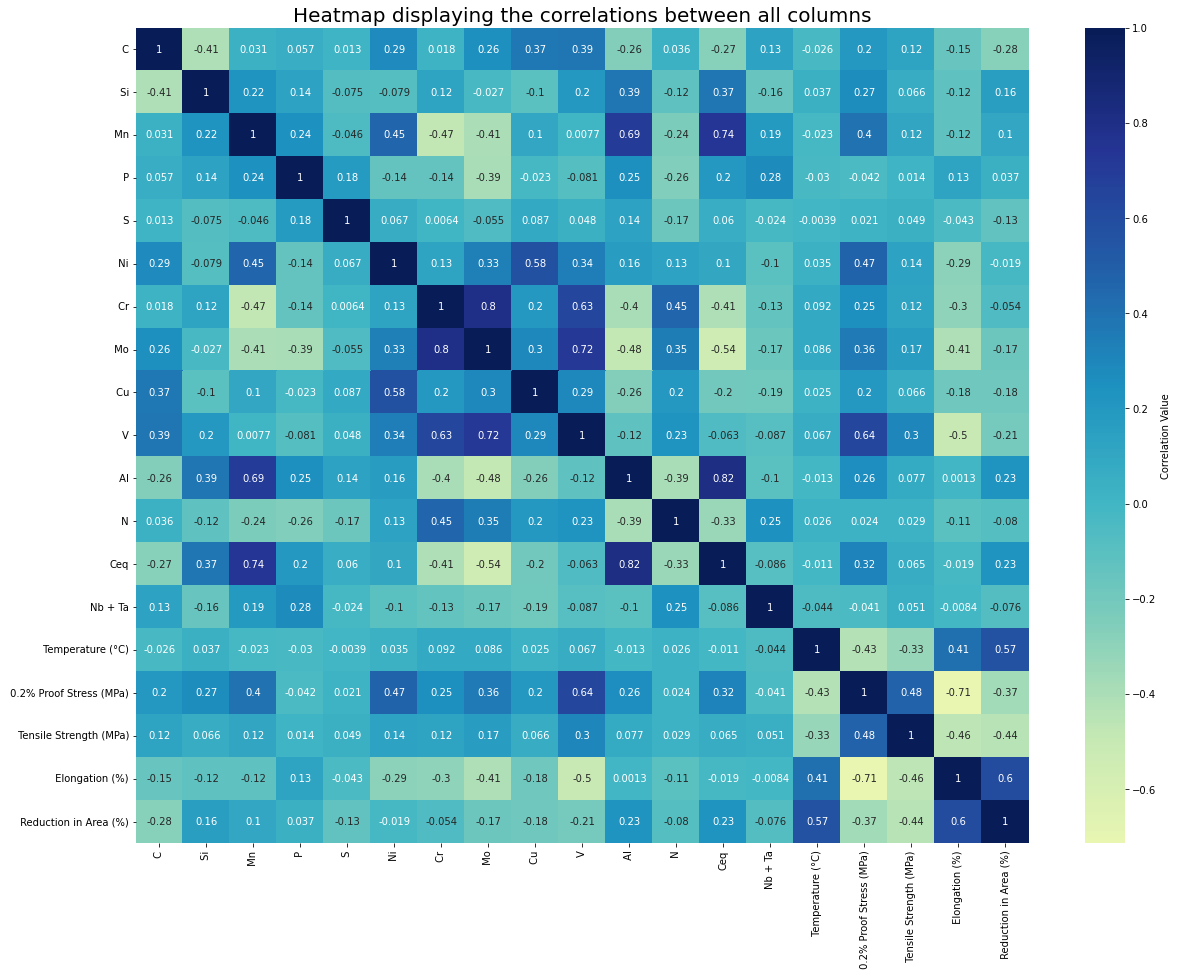

In [ ]:
corr = data.corr()

plt.figure(figsize=(20,15))
plt.title("Heatmap displaying the correlations between all columns", fontsize=20)
sns.heatmap(corr, center=0, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Correlation Value'})
plt.show()

## **From above diagram following conclusions can be made:**
1. Temperature has significant influence on % Elongation and % Reduction in area.
2. 0.2% Proof Strength is highly influenced by presence of V, Ni, Mn, Mo, Ceq, Si, Al, Cr, C and Cu in decreasing order.
3. Tensile Strength is highly influenced by presence of V and moderately influenced by presence of Mo, Ni, Cr, C and Mn in decreasing order.
4. Tensile Strength is also highly related to 0.2% Proof Strength.
5. % Elongation and % Reduction in Area show maximum correlation with each other followed by temperature.
6. % Elongation is moderately influenced by presence of P and slightly influenced by presence of Al
7. % Reduction in Area is moderately influenced by presence of Al, Ceq, Si and Mn.

In [ ]:
# x includes all the input features including the composition of the alloy and temperature
# y includes the mechanical properties of the alloy which are to be predicted by the model
x = data.iloc[:, 1:16].values
y = data.iloc[:, 16:].values

# Making the train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, shuffle = True, random_state = 2)

In [ ]:
# Scaling down the inputs and outputs
# Scaling method used here is : scaled_value = (x - mean)/(std_dev) 

sc_x = StandardScaler()
sc_x.fit(x_train)
x_train_sc = sc_x.transform(x_train)
x_test_sc = sc_x.transform(x_test)

sc_y = StandardScaler()
sc_y.fit(y_train)
y_train_sc = sc_y.transform(y_train)
y_test_sc = sc_y.transform(y_test)

In [ ]:
print(min(y_train_sc[:,0]))

-2.2819541817681674


In [ ]:
# To be used later while visualizing results
actual_proof_strength = np.transpose(y_test)[0]
actual_tensile_strength = np.transpose(y_test)[1]
actual_pct_elongation = np.transpose(y_test)[2]
actual_pct_reduction_area = np.transpose(y_test)[3]